# Assignment 3:  Bias & Variance (60 points)
## Due Thursday, February 8, 2024 at 11:59PM
**Turnin this programming part of the assignment through BlackBoard in .ipynb notebook format.**


**This assignment aims to create the bias/variances figures similar to the figures 4.5 and 4.6 in section 4.7 of Alpaydin to help you have deeper understanding of bias and variance.**

## Question one (20 points)
**Replicate figures 4.5 in section 4.7 of Alpyadin 4th edition**

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**The ground truth function for the regression is f(x) = 2 cos(x) + tan(0.5x)**

**Generate 100 sample datasets with f(x) + Gaussian white noise (N(0,1)). Each dataset will have 20 points randomly selected x from [-2,3] with corresponding target points.**

In [2]:
# Ground truth target function
def f(x):
    return 2 * np.cos(x) + np.tan(0.5*x)

# seed
np.random.seed(62)
# x
x = np.random.uniform(-2.0, 3.0, [100, 20])
x = np.sort(x)

# Ground truth targets
g = f(x)
# Add white noise
noisy = np.random.normal(0, 1, [100, 20])
# y
y = g + noisy

# use linspace(0,5,100) as test set to plot the images
x_test = np.linspace(-2,3,100)

###TODO: Use the First 5 datasets to generate 4 plots.</strong>
 - Figure one: Function f(x) = 2cos(x)+tan(0.5x) and one noisy dataset sampled from the function, namely "Function, and data".
 - Figure two: Generate five polynomial fits of degree ONE based on the first five datasets and name this figure with "Order 1"
 - Figure three: Generate five polynomial fits of degree THREE based on the first five datasets and name this figure with "Order 3"
 - Figure four: Generate five polynomial fits of degree FIVE based on the first five datasets and name this figure with "Order 5"
 - For figures two, three, and four, please add a dotted line as an average line for the five fits.
  
  
<b> Please use x_test to plot all the model functions, not just the ground truth function. This will make all the higher polynomial models look smoother. </b>

<br>

<strong>Hint: You can use the Sklearn’s PolynomialFeatures and LinearRegression. </storng>
- https://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions

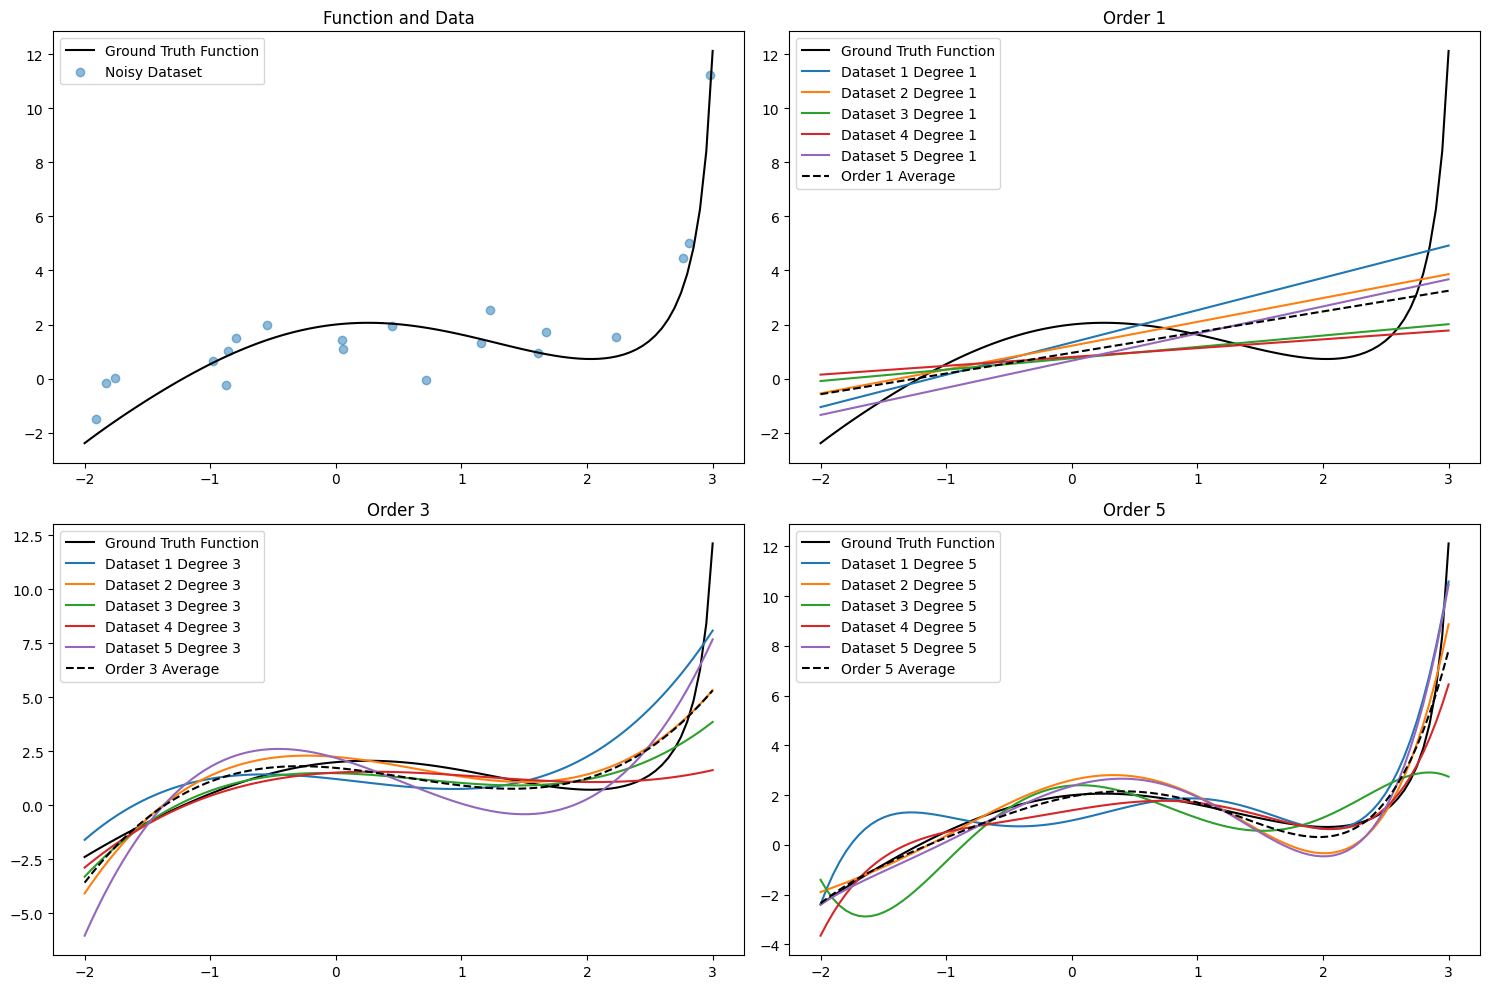

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Setting up the Canvas for plotting the required graphs
plt.figure(figsize=(15, 10))

# Figure one: Ground truth function and one noisy dataset
plt.subplot(2, 2, 1)
plt.plot(x_test, f(x_test), label='Ground Truth Function', color='black')
plt.scatter(x[0], y[0], label='Noisy Dataset', alpha=0.5)
plt.title('Function and Data')
plt.legend()

# Figures two, three, and four: Polynomial fits of degrees 1, 3, and 5
for i, order in enumerate([1, 3, 5]):
    plt.subplot(2, 2, i + 2)
    plt.plot(x_test, f(x_test), label='Ground Truth Function', color='black')

    # Fit polynomial models on the first five datasets
    models = []
    for j in range(5):
        poly = PolynomialFeatures(degree=order)
        X_poly = poly.fit_transform(x[j].reshape(-1, 1))
        model = LinearRegression()
        model.fit(X_poly, y[j])
        y_pred = model.predict(poly.transform(x_test.reshape(-1, 1)))
        plt.plot(x_test, y_pred, label=f'Dataset {j + 1} Degree {order}', linestyle='solid')
        models.append(model)

    # Calculate and plot the average line with a dashed line
    average_line = np.mean(np.vstack([model.predict(poly.transform(x_test.reshape(-1, 1))) for model in models]), axis=0)
    plt.plot(x_test, average_line, label=f'Order {order} Average', linestyle='dashed', color='black')

    plt.title(f'Order {order}')
    plt.legend()

plt.tight_layout()
plt.show()

## Question 2 (40 points)





###TODO: Part 2a. Generate figure similar with Figure 4.6 from Alpaydin 4th Edition**

**The x-axis is the order of polynomial model, from 1 to 5. the y-axis is the error. The plot should contain three curves: total error, bias error and variance error.**

**Use all 100 dataset to compute the total error, bias error and variance error functions by using total error equation (4.36): $Ex[(E[r|x]-g(x))^2|x] = (E[r|x]) - E_X(g(x))^2 + E_X[(g(x)-E_X[g(x)])^2]$**

**Evaluate each of the three error functions with 10 equally spaced values starting from -2 and ending at 3, i.e. np.linspace(-2, 3, 10)**


**Hint: For bias error $(E[r|x]) - E_X(g(x))^2$, $E[r|x] = f(x)$ and $E_X[g(x)]$ is the average over 100 models from the 100 datasets. Then, you can approximate bias error by average over x in np.linspace(-2, 3, 10) of $(E[r|x] - E_X[g(x)])2$.**

**Hint: For variance error, you need to have a nested loops (for each dataset and for  x in np.linespace(0, 5, 10))  to get the average variance error.**

**Hint: The total error is the sum of bias error and variance error.**

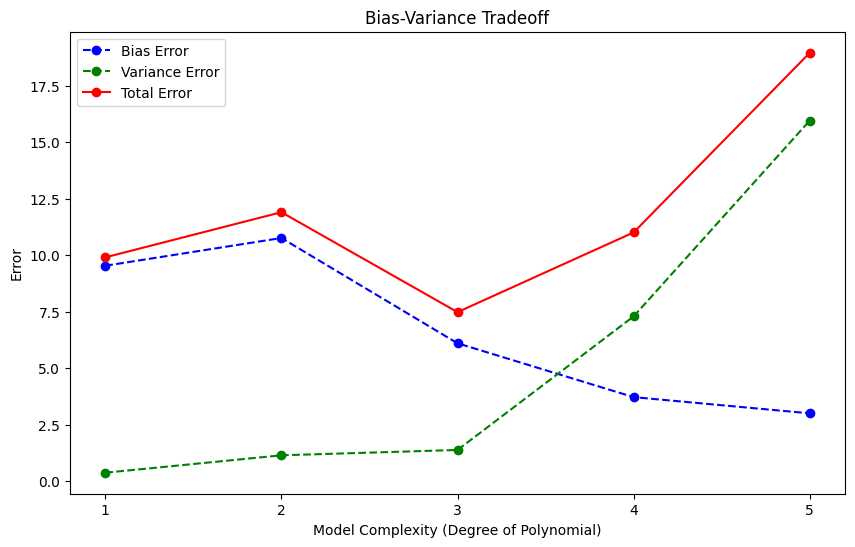

In [4]:
# Generate a test set for evaluation
x_test = np.linspace(-2, 3, 10)

# Polynomial degrees to be evaluated
degrees = [1, 2, 3, 4, 5]

# Lists to store errors for each polynomial degree
bias_errors = []
variance_errors = []
total_errors = []

# Loop through each polynomial degree
for degree in degrees:
    # Generate predictions for each dataset using polynomial regression
    y_preds = np.array([np.polyval(np.polyfit(x[j], y[j], degree), x_test) for j in range(100)])

    # Calculate bias error for the current degree
    bias_error = np.mean((np.mean(y_preds, axis=0) - f(x_test))**2)

    # Calculate variance error for the current degree
    variance_error = np.mean(np.var(y_preds, axis=0))

    # Calculate total error as the sum of bias and variance errors
    total_error = bias_error + variance_error

    # Append errors to the respective lists
    bias_errors.append(bias_error)
    variance_errors.append(variance_error)
    total_errors.append(total_error)

# Plotting the bias-variance tradeoff with specific x-axis ticks and markers
plt.figure(figsize=(10, 6))
plt.plot(degrees, bias_errors, label='Bias Error',linestyle='dashed', marker='o', color='blue')
plt.plot(degrees, variance_errors, label='Variance Error',  linestyle='dashed', marker='o', color='green')
plt.plot(degrees, total_errors, label='Total Error', marker='o',color='red')
plt.title('Bias-Variance Tradeoff')
plt.xlabel('Model Complexity (Degree of Polynomial)')
plt.ylabel('Error')
plt.xticks(degrees)
plt.legend()
plt.show()

###TODO: Part 2b. Generate and print a DataFrame with 5 rows, one for each order and 4 columns. The 4 columns are:
 * **Order**
 * **Bias error**
 * **Variance error**
 * **Total error**

In [5]:
# Generate a DataFrame with 5 rows, one for each order and 4 required columns
df = pd.DataFrame({
    'Order': [1,2,3,4,5],
    'Bias error': bias_errors,
    'Variance error': variance_errors,
    'Total error': total_errors
})

# Print the DataFrame
print(df)

   Order  Bias error  Variance error  Total error
0      1    9.531254        0.370950     9.902203
1      2   10.759614        1.141956    11.901570
2      3    6.100087        1.378274     7.478360
3      4    3.716443        7.291555    11.007998
4      5    2.999806       15.960043    18.959849
